In [118]:
 """
 import libraries
 Get data 
 Clean data
 Exploratory Data Analysis
 Feature Engineering
 Select Model
 Train model
 Evaluate the model
 Predict, deploy model """

'\nimport libraries\nGet data \nClean data\nExploratory Data Analysis\nFeature Engineering\nSelect Model\nTrain model\nEvaluate the model\nPredict, deploy model '

In [120]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid


In [122]:
# get the data set from tensorflow's dataset
mnist = tf.keras.datasets.mnist

In [124]:
# load the data and split into training and test datasets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [126]:
# view basic information about the dataset
print(f"X_train {X_train.shape}")
print(f"y_train {y_train.shape}")

print (f"X_test {X_test.shape}")
print(f"y_test {y_test.shape}")

X_train (60000, 28, 28)
y_train (60000,)
X_test (10000, 28, 28)
y_test (10000,)


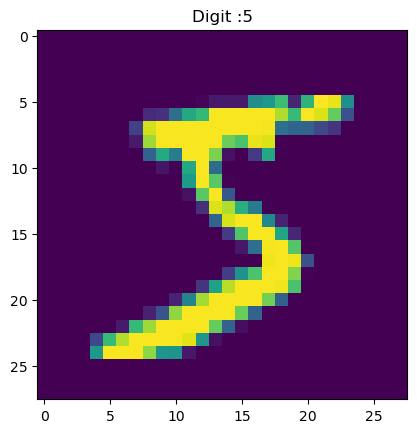

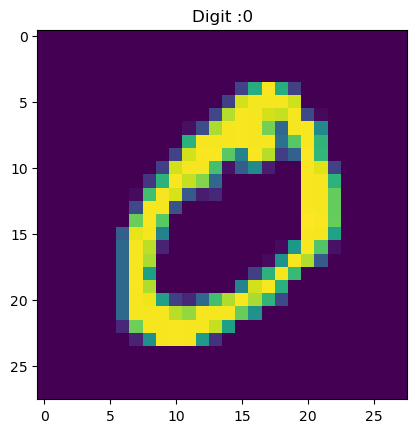

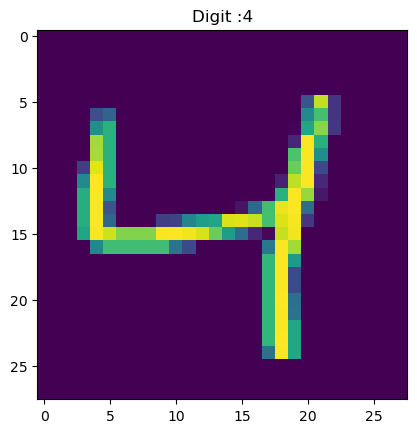

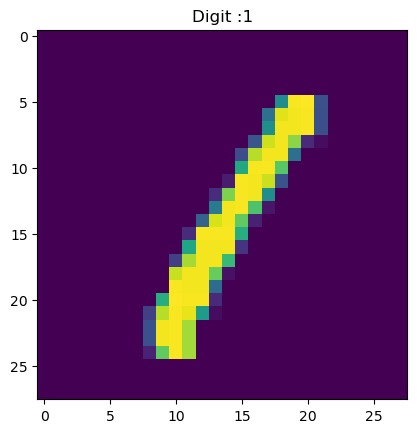

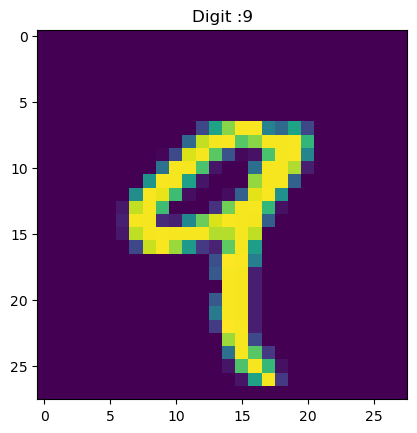

In [128]:
# view the first 5 variables

for i in range (5):
    fig, ax = plt.subplots()
    ax.imshow(X_train[i])
    ax.set_title(f"Digit :{y_train[i]}")
    

In [130]:
# carry out feature engineering
X_train = X_train.reshape((60000, 28 * 28))
X_train = X_train.astype("float32") / 255
X_test = X_test.reshape((10000, 28 * 28))
X_test = X_test.astype("float32") / 255


In [132]:

X_train.shape

(60000, 784)

In [140]:
y_train.shape

(60000, 10)

In [142]:
# convert y_train and y_test to onehot vectors
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [144]:
y_train.shape

(60000, 10, 2)

In [146]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
      
        Dense(25, activation = 'relu', name = 'L1'),
        Dense(15, activation = 'relu', name = 'L2'),
        Dense(10, activation = 'linear', name = 'L3')
      
    ], name = "my_model" 
)
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X_train,y_train,
    epochs=10,
)

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(32, 10, 2), output.shape=(32, 10)

In [116]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (32, 25)               │        19,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (32, 15)               │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (32, 10)               │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,527 (236.44 KB)

 Trainable params: 20,175 (78.81 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 40,352 (157.63 KB)